In [52]:
import os

In [53]:
from dotenv import load_dotenv
load_dotenv()

True

In [54]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-2024-08-06")


In [56]:
llm.invoke("hi").content

'Hello! How can I assist you today?'

In [57]:
print(llm.invoke("What is the capital of india tell me in detail?").content)

The capital of India is New Delhi. It serves as the seat of all three branches of the government of India, which includes the Executive, the Legislature, and the Judiciary. The President of India, the Prime Minister, and the Parliament are all located in New Delhi.

### Historical Background

- **Foundation**: New Delhi was inaugurated as the capital of India in 1931, replacing Kolkata (Calcutta) as the administrative center.
- **Design**: The city was designed by British architects Sir Edwin Lutyens and Herbert Baker, leading to the area being called "Lutyens' Delhi" after the main architect.
- **Historical Sites**: It is home to numerous historical landmarks and monuments, such as India Gate, Rashtrapati Bhavan (the President's House), and the Parliament House.

### Geography

- **Location**: New Delhi is situated within the National Capital Territory of Delhi, a large metropolitan area that includes the older city of Delhi and surrounding regions.
- **Climate**: The climate is chara

In [58]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY =  os.getenv("TAVILY_API_KEY")
search_tool = TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

In [59]:
search_tool.invoke("What is the capital of France?")

[{'title': 'List of capitals of France - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/List_of_capitals_of_France',
  'content': 'This is a chronological list of capitals of France. The capital of France has been Paris since its liberation in 1944.\n\n## Chronology\n\n[edit] [...] - Tours (10–13 June 1940), the city served as the temporary capital of France during World War II after the government fled Paris due to the German advance.\n- Bordeaux (June 1940), the government was relocated from Paris to Tours then Bordeaux very briefly during World War II, when it became apparent that Paris would soon fall into German hands. [...] - Paris (1789–1871), on 5 and 6 October 1789, a throng from Paris invaded the castle and forced the royal family to move back to Paris. The National Constituent Assembly "National Constituent Assembly (France)") followed the King to Paris soon afterward; Versailles lost its role of capital city.',
  'score': 0.8993429},
 {'title': 'Paris facts: the capita

In [60]:
my_code = """
x=10
y=x+10
print(y)
"""

In [61]:
from langchain_experimental.utilities import PythonREPL

- It simulates a Python shell:

- Accepts a Python code string (like "2 + 2" or "import math; math.sqrt(16)")

- Executes the code

- Returns the output (as a string)

In [62]:
from langchain_experimental.utilities import PythonREPL

repl = PythonREPL()
result = repl.run("2 + 3 * 4")
print(repr(result))  # <- use repr to inspect exact value
print(result.strip())  # Output: 14


''



In [63]:
repl = PythonREPL()

In [64]:
repl.run(my_code)

'20\n'

In [65]:
# repl.invoke(my_code)

In [66]:
from typing import Annotated
from langchain_core.tools import tool

In [67]:
@tool
def python_repl_tool(code: Annotated[str, "The python code to execute to generate your chart."]):
    """Use this to execute python code and do math. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return result_str

<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
C:\Users\Mohan\AppData\Local\Temp\ipykernel_10636\2860116823.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
C:\Users\Mohan\AppData\Local\Temp\ipykernel_10636\2860116823.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [68]:
python_repl_tool.invoke("x=10\ny=x+10\nprint(y)")

'Successfully executed:\n\\`\\`\\`python\nx=10\ny=x+10\nprint(y)\n\\`\\`\\`\nStdout: 20\n'

In [69]:
python_repl_tool.invoke(my_code)

'Successfully executed:\n\\`\\`\\`python\n\nx=10\ny=x+10\nprint(y)\n\n\\`\\`\\`\nStdout: 20\n'

### WE HAVE TWO SUB AGENT 
1. RESEARCHER- internet
2. CODER- executing the code

In [70]:
members = ["researcher","coder"]

In [71]:
members

['researcher', 'coder']

In [72]:
options = members + ["FINISH"]

In [73]:
options

['researcher', 'coder', 'FINISH']

In [74]:
from typing import Literal

In [75]:
from typing_extensions import TypedDict

### There is no routing logic
-  it is simply going to return the next candidate(next_agent)
-  this next is containig the next candidate name

In [76]:
class Router(TypedDict):
    next: Literal['researcher', 'coder', 'FINISH']

In [77]:

from langgraph.graph import MessagesState,StateGraph,START, END

#### this is a messagesstate which we are loading from the langgraph(inbuilt message state)

In [78]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [79]:
##### this is how my state will be looking like

In [ ]:
class State(MessagesState):
    next:str

In [ ]:
# This is how the state will be looking like
state  = {"messages": ["hi"], "next": "research_agent"}

In [81]:
system_prompt = f""""
You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

In [82]:
# system_prompt = f""""
# You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
# Given the following user request, respond with the worker to act next. 
# Each worker will perform a task and respond with their results and status. 
# When finished, respond with FINISH.
# **Strict Guidelines:**
# if there is any common messages like hi, hello, how are you, greetings etc then,respond with FINISH.
# """

In [83]:
print(system_prompt)

"
You are a supervisor, tasked with managing a conversation between the following workers: ['researcher', 'coder']. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.



In [84]:
state["messages"]

['hi']

In [85]:
messages = [{"role": "system", "content": system_prompt},] + state["messages"]

In [86]:
messages

[{'role': 'system',
  'content': '"\nYou are a supervisor, tasked with managing a conversation between the following workers: [\'researcher\', \'coder\']. \nGiven the following user request, respond with the worker to act next. \nEach worker will perform a task and respond with their results and status. \nWhen finished, respond with FINISH.\n'},
 'hi']

In [87]:
from langgraph.types import Command

-  `Command` is a class used to control execution flow between different nodes in the graph.

In [88]:
# state["messages"]

In [89]:
def supervisor_agent(state:State)->Command[Literal['researcher', 'coder', '__end__']]:
    
    messages = [{"role": "system", "content": system_prompt},] + state["messages"]
    
    llm_with_structure_output = llm.with_structured_output(Router)
    
    response = llm_with_structure_output.invoke(messages)
    
    #this is my response {'next': 'researcher'}
    
    #this is my next worker agent
    goto = response["next"]
    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
    
    # class State(MessagesState):
    #   next:str
    # output of the state: state={"messages": ["hi"], "next": "researcher"}
    
    return Command(goto=goto, update={"next":goto})

In [90]:
from langgraph.prebuilt import create_react_agent

In [91]:
from langchain_core.messages import AIMessage, HumanMessage

In [92]:
def research_agent(state: State) -> Command[Literal["supervisor"]]:
    
    research_agent = create_react_agent(llm, tools  = [search_tool], prompt="You are a researcher. DO NOT do any math.")
    
    result = research_agent.invoke(state)
    
    return Command(
        update = {
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researcher")
            ]
        },
        goto="supervisor",
    )
    

In [93]:
def coder_agent(state:State)->Command[Literal['supervisor']]:
    code_agent = create_react_agent(llm,tools=[python_repl_tool], prompt="You are a coder. DO NOT do any research.")
    result = code_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="coder")
            ]
        },
        goto="supervisor",
    )
    

#### this is my orchestration flow with langgraph

In [94]:
#Workflow
graph = StateGraph(State)
graph.add_node("supervisor", supervisor_agent)
graph.add_node("researcher", research_agent)
graph.add_node("coder", coder_agent)

graph.add_edge(START, "supervisor")
app=graph.compile()

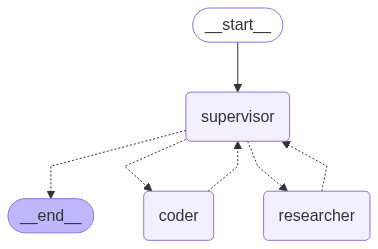

In [95]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [96]:
for s in app.stream({"messages": [("user", "What's the square root of 42?")]}, subgraphs=True):
    print(s)
    print("**********BELOW IS MY STATE***************")

**********BELOW IS MY GOTO***************
coder
((), {'supervisor': {'next': 'coder'}})
**********BELOW IS MY STATE***************
(('coder:326dceb5-f6a3-5c3f-7ef1-1de022835643',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AEv8C8sxVtBPSKkIeEG7QTAy', 'function': {'arguments': '{"code":"import math\\nmath.sqrt(42)"}', 'name': 'python_repl_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 107, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-Bpt3pNEw84OE0CLZOummBTipmsXyU', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bbed7d42-d538-4096-bd38-ee3806483e73-0', tool

In [97]:
result = app.invoke({"messages": [("user", "what is an efficent python code to get prime number?")]}, subgraphs=True)

**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
researcher
**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
FINISH


In [98]:
result = app.invoke({"messages": [("user", "what is an efficent python code to get prime number?")]}, subgraphs=True)

**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
FINISH
